## Importar bibliotecas e configurações

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Carregamento dos Dados

In [2]:
# Carregar dados
df = pd.read_csv('../AmesHousing.csv')

print(f"Shape do dataset: {df.shape}")
print(f"Número de linhas: {df.shape[0]:,}")
print(f"Número de colunas: {df.shape[1]}")

Shape do dataset: (2930, 82)
Número de linhas: 2,930
Número de colunas: 82


In [3]:
# Primeiras linhas
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## 2. Análise do Target (SalePrice)

In [5]:
# Estatísticas descritivas do target
target_stats = df['SalePrice'].describe()
print("Estatísticas do SalePrice:")
print(target_stats)
print(f"\nPreço médio: ${target_stats['mean']:,.2f}")
print(f"Preço mediano: ${target_stats['50%']:,.2f}")
print(f"Preço mínimo: ${target_stats['min']:,.2f}")
print(f"Preço máximo: ${target_stats['max']:,.2f}")

Estatísticas do SalePrice:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Preço médio: $180,796.06
Preço mediano: $160,000.00
Preço mínimo: $12,789.00
Preço máximo: $755,000.00


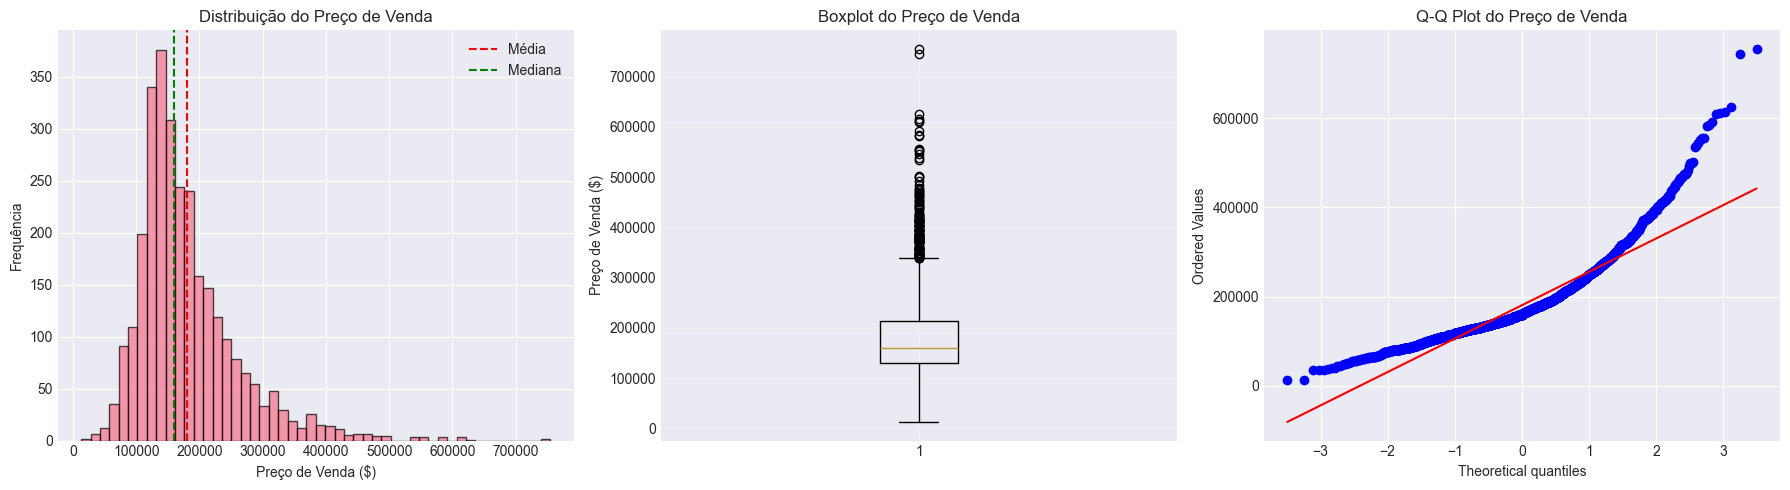


Assimetria (Skewness): 1.74
Distribuição positivamente assimétrica (cauda à direita)


In [6]:
# Distribuição do SalePrice
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Preço de Venda ($)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Preço de Venda')
axes[0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label='Média')
axes[0].axvline(df['SalePrice'].median(), color='green', linestyle='--', label='Mediana')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['SalePrice'])
axes[1].set_ylabel('Preço de Venda ($)')
axes[1].set_title('Boxplot do Preço de Venda')
axes[1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(df['SalePrice'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot do Preço de Venda')

plt.tight_layout()
plt.show()

# Verificar assimetria
skewness = df['SalePrice'].skew()
print(f"\nAssimetria (Skewness): {skewness:.2f}")
if skewness > 0.5:
    print("Distribuição positivamente assimétrica (cauda à direita)")
elif skewness < -0.5:
    print("Distribuição negativamente assimétrica (cauda à esquerda)")
else:
    print("Distribuição aproximadamente simétrica")

## 3. Análise de Valores Ausentes

In [7]:
# Valores ausentes
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)
missing_table = pd.DataFrame({
    'Valores Ausentes': missing,
    'Percentual (%)': missing_percent
})
missing_table = missing_table[missing_table['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)

print(f"Total de colunas com valores ausentes: {len(missing_table)}")
print(f"\nTop 15 colunas com mais valores ausentes:")
print(missing_table.head(15))

Total de colunas com valores ausentes: 27

Top 15 colunas com mais valores ausentes:
                Valores Ausentes  Percentual (%)
Pool QC                     2917       99.556314
Misc Feature                2824       96.382253
Alley                       2732       93.242321
Fence                       2358       80.477816
Mas Vnr Type                1775       60.580205
Fireplace Qu                1422       48.532423
Lot Frontage                 490       16.723549
Garage Cond                  159        5.426621
Garage Qual                  159        5.426621
Garage Finish                159        5.426621
Garage Yr Blt                159        5.426621
Garage Type                  157        5.358362
Bsmt Exposure                 83        2.832765
BsmtFin Type 2                81        2.764505
Bsmt Cond                     80        2.730375


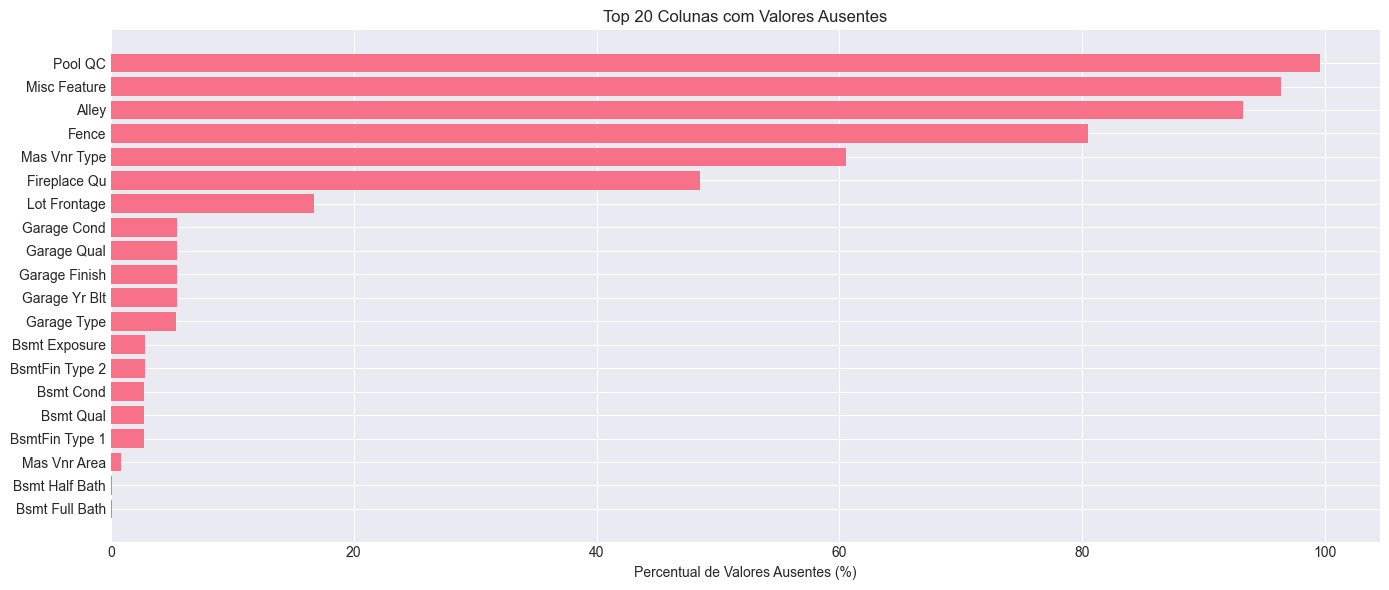

In [8]:
# Visualizar valores ausentes
if len(missing_table) > 0:
    plt.figure(figsize=(14, 6))
    top_missing = missing_table.head(20)
    plt.barh(range(len(top_missing)), top_missing['Percentual (%)'])
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Percentual de Valores Ausentes (%)')
    plt.title('Top 20 Colunas com Valores Ausentes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores ausentes no dataset!")

## 4. Análise de Features Numéricas

In [9]:
# Selecionar features numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover identificadores
if 'Order' in numerical_features:
    numerical_features.remove('Order')
if 'PID' in numerical_features:
    numerical_features.remove('PID')
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print(f"Total de features numéricas: {len(numerical_features)}")
print(f"\nPrimeiras 20 features numéricas:")
print(numerical_features[:20])

Total de features numéricas: 36

Primeiras 20 features numéricas:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']


In [10]:
# Estatísticas descritivas das principais features numéricas
main_numerical = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                  'Total Bsmt SF', 'Full Bath', 'Bedroom AbvGr', 
                  'Garage Cars', 'Garage Area']

df[main_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.00,1442.0,1742.75,5642.0
Total Bsmt SF,2929.0,1051.614544,440.615067,0.0,793.00,990.0,1302.00,6110.0
Full Bath,2930.0,1.566553,0.552941,0.0,1.00,2.0,2.00,4.0
Bedroom AbvGr,2930.0,2.854266,0.827731,0.0,2.00,3.0,3.00,8.0
Garage Cars,2929.0,1.766815,0.760566,0.0,1.00,2.0,2.00,5.0
Garage Area,2929.0,472.819734,215.046549,0.0,320.00,480.0,576.00,1488.0


In [11]:
# Correlação com SalePrice
correlations = df[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

print("Top 15 Features mais correlacionadas com SalePrice:")
print(correlations.head(16)[1:])  # Excluir a própria SalePrice

print("\n\nTop 10 Features com correlação negativa:")
print(correlations.tail(10))

Top 15 Features mais correlacionadas com SalePrice:
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Name: SalePrice, dtype: float64


Top 10 Features com correlação negativa:
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
Name: SalePrice, dtype: float64


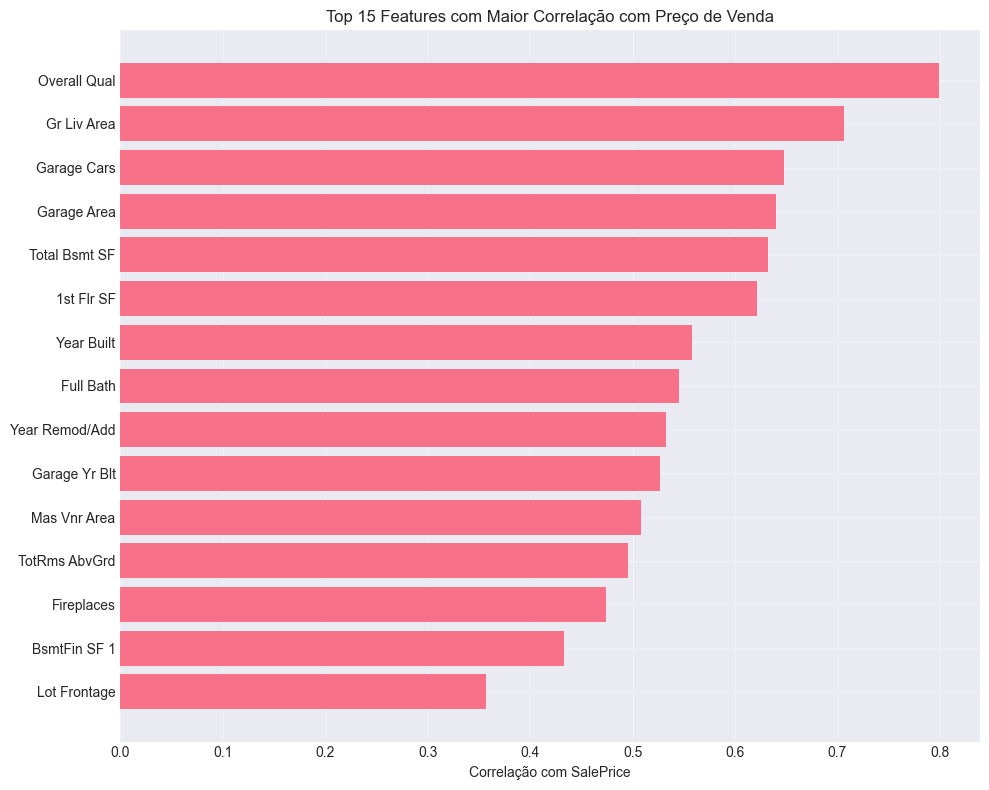

In [12]:
# Visualizar top correlações
top_corr = correlations.head(16)[1:]  # Top 15 (excluindo SalePrice)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlação com SalePrice')
plt.title('Top 15 Features com Maior Correlação com Preço de Venda')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

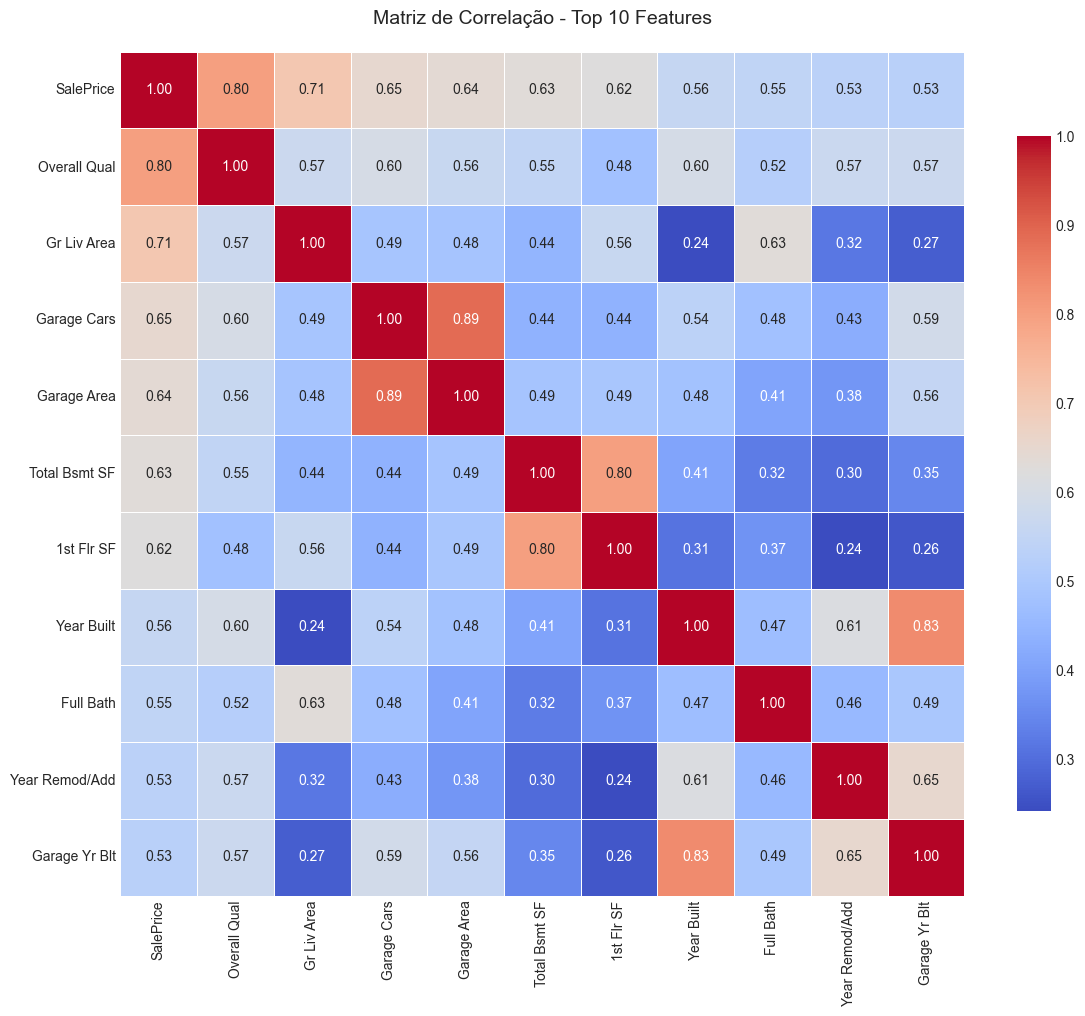

In [13]:
# Matriz de correlação das principais features
top_features = correlations.head(11).index.tolist()  # Top 10 + SalePrice

plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Top 10 Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 5. Análise de Features Categóricas

In [14]:
# Selecionar features categóricas
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Total de features categóricas: {len(categorical_features)}")
print(f"\nFeatures categóricas:")
for i, col in enumerate(categorical_features, 1):
    unique_values = df[col].nunique()
    print(f"{i:2d}. {col:25s} - {unique_values:3d} valores únicos")

Total de features categóricas: 43

Features categóricas:
 1. MS Zoning                 -   7 valores únicos
 2. Street                    -   2 valores únicos
 3. Alley                     -   2 valores únicos
 4. Lot Shape                 -   4 valores únicos
 5. Land Contour              -   4 valores únicos
 6. Utilities                 -   3 valores únicos
 7. Lot Config                -   5 valores únicos
 8. Land Slope                -   3 valores únicos
 9. Neighborhood              -  28 valores únicos
10. Condition 1               -   9 valores únicos
11. Condition 2               -   8 valores únicos
12. Bldg Type                 -   5 valores únicos
13. House Style               -   8 valores únicos
14. Roof Style                -   6 valores únicos
15. Roof Matl                 -   8 valores únicos
16. Exterior 1st              -  16 valores únicos
17. Exterior 2nd              -  17 valores únicos
18. Mas Vnr Type              -   4 valores únicos
19. Exter Qual           

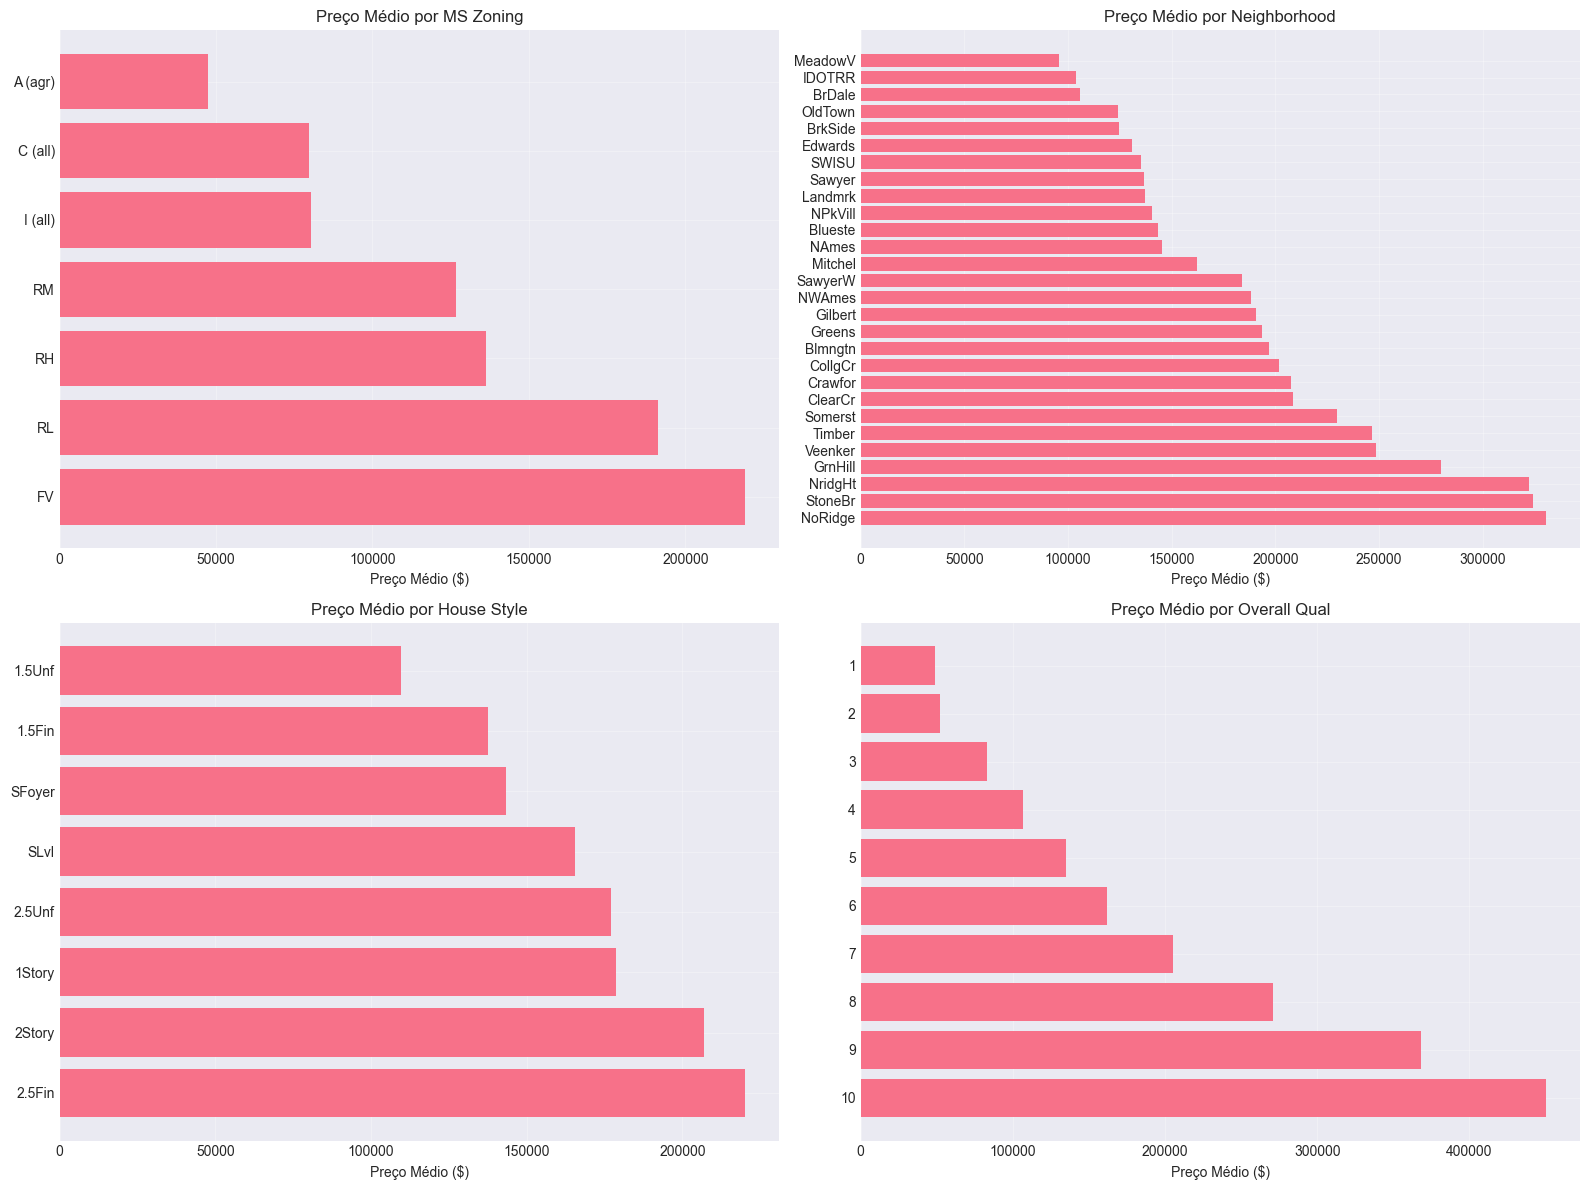

In [15]:
# Analisar principais features categóricas
main_categorical = ['MS Zoning', 'Neighborhood', 'House Style', 'Overall Qual', 
                    'Overall Cond', 'Bldg Type', 'Exter Qual', 'Kitchen Qual']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(main_categorical[:4]):
    if col in df.columns:
        # Média de preço por categoria
        cat_price = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
        
        axes[idx].barh(range(len(cat_price)), cat_price.values)
        axes[idx].set_yticks(range(len(cat_price)))
        axes[idx].set_yticklabels(cat_price.index)
        axes[idx].set_xlabel('Preço Médio ($)')
        axes[idx].set_title(f'Preço Médio por {col}')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Análise Bivariada - Scatter Plots

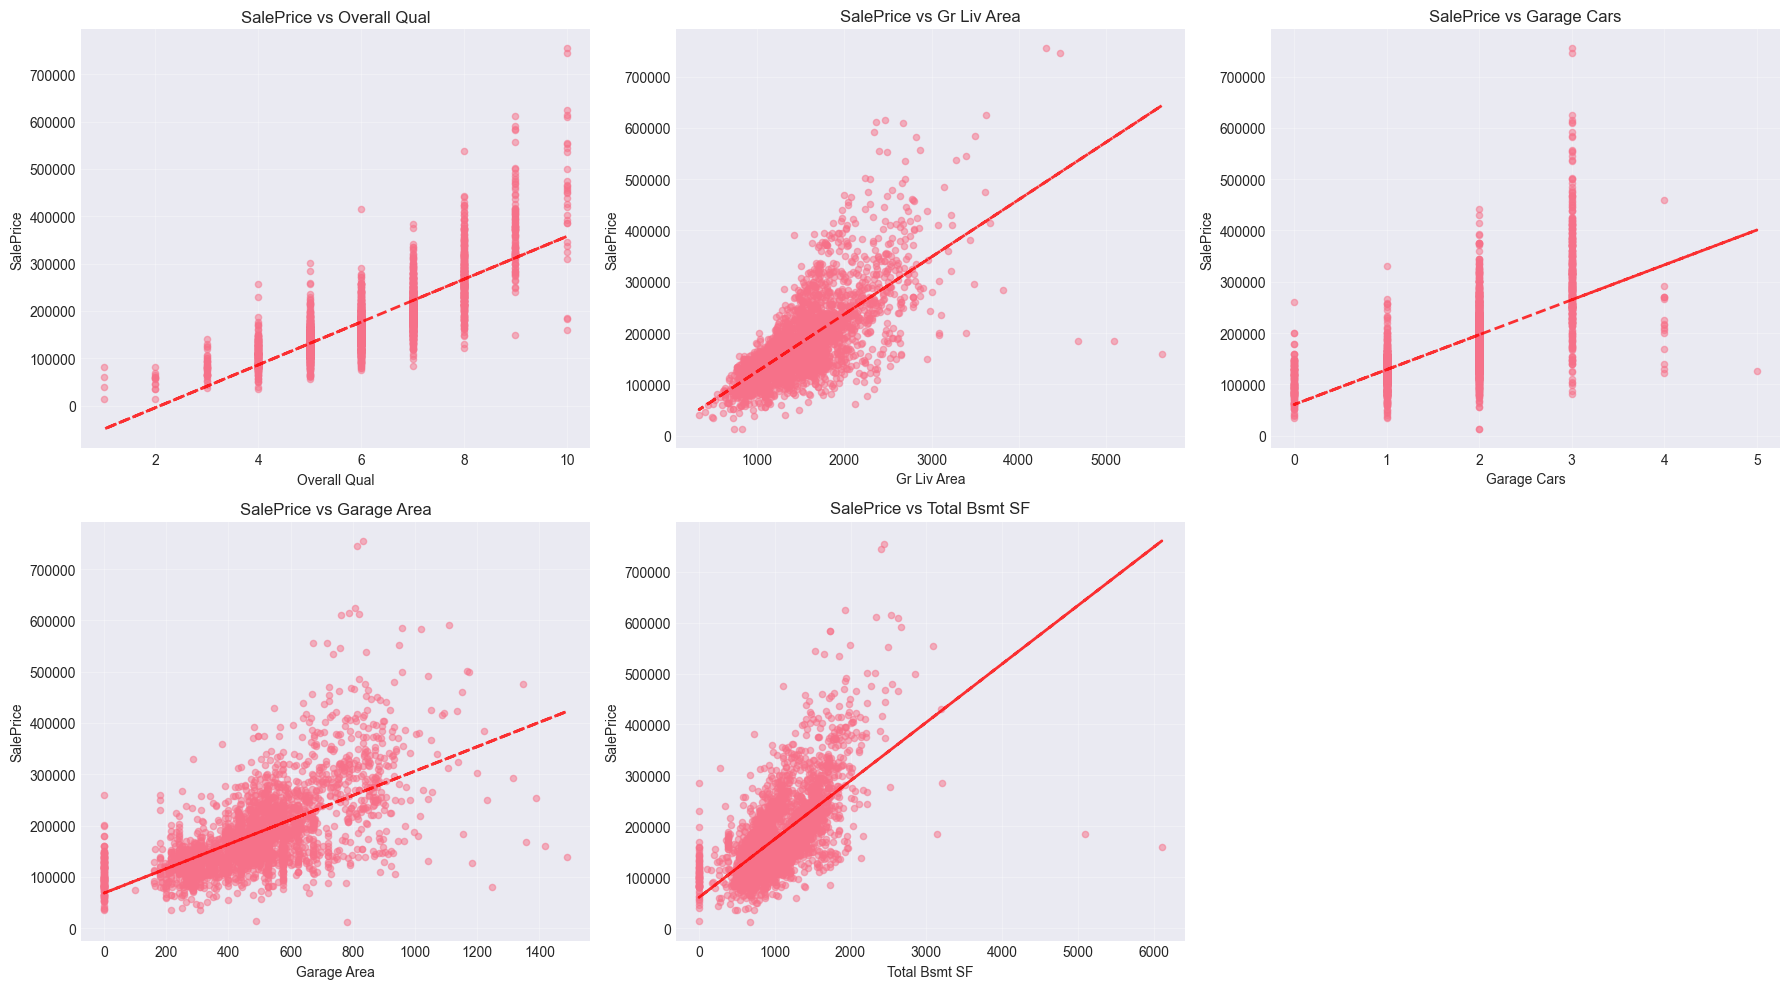

In [16]:
# Scatter plots das features mais correlacionadas
top_5_features = correlations.head(6).index.tolist()[1:]  # Top 5 excluindo SalePrice

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_5_features):
    axes[idx].scatter(df[feature], df['SalePrice'], alpha=0.5, s=20)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    axes[idx].set_title(f'SalePrice vs {feature}')
    axes[idx].grid(True, alpha=0.3)
    
    # Adicionar linha de tendência
    z = np.polyfit(df[feature].fillna(df[feature].mean()), df['SalePrice'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature].fillna(df[feature].mean()), 
                   p(df[feature].fillna(df[feature].mean())), 
                   "r--", alpha=0.8, linewidth=2)

# Remover subplot extra
axes[-1].remove()

plt.tight_layout()
plt.show()

## 7. Análise de Outliers

In [17]:
# Identificar outliers nas principais features
def identify_outliers_iqr(data, column):
    """Identifica outliers usando IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Analisar outliers nas principais features numéricas
outlier_analysis = []

for col in main_numerical + ['SalePrice']:
    if col in df.columns:
        n_outliers, lower, upper = identify_outliers_iqr(df, col)
        outlier_analysis.append({
            'Feature': col,
            'Outliers': n_outliers,
            'Percentual (%)': 100 * n_outliers / len(df),
            'Lower Bound': lower,
            'Upper Bound': upper
        })

outlier_df = pd.DataFrame(outlier_analysis).sort_values('Outliers', ascending=False)
print("Análise de Outliers (método IQR):")
print(outlier_df)

Análise de Outliers (método IQR):
          Feature  Outliers  Percentual (%)  Lower Bound  Upper Bound
9       SalePrice       137        4.675768     3500.000   339500.000
0        Lot Area       127        4.334471     1267.750    17727.750
4   Total Bsmt SF       123        4.197952       29.500     2065.500
6   Bedroom AbvGr        78        2.662116        0.500        4.500
3     Gr Liv Area        75        2.559727      200.875     2667.875
8     Garage Area        42        1.433447      -64.000      960.000
7     Garage Cars        17        0.580205       -0.500        3.500
1      Year Built         9        0.307167     1883.500     2071.500
5       Full Bath         4        0.136519       -0.500        3.500
2  Year Remod/Add         0        0.000000     1906.500     2062.500


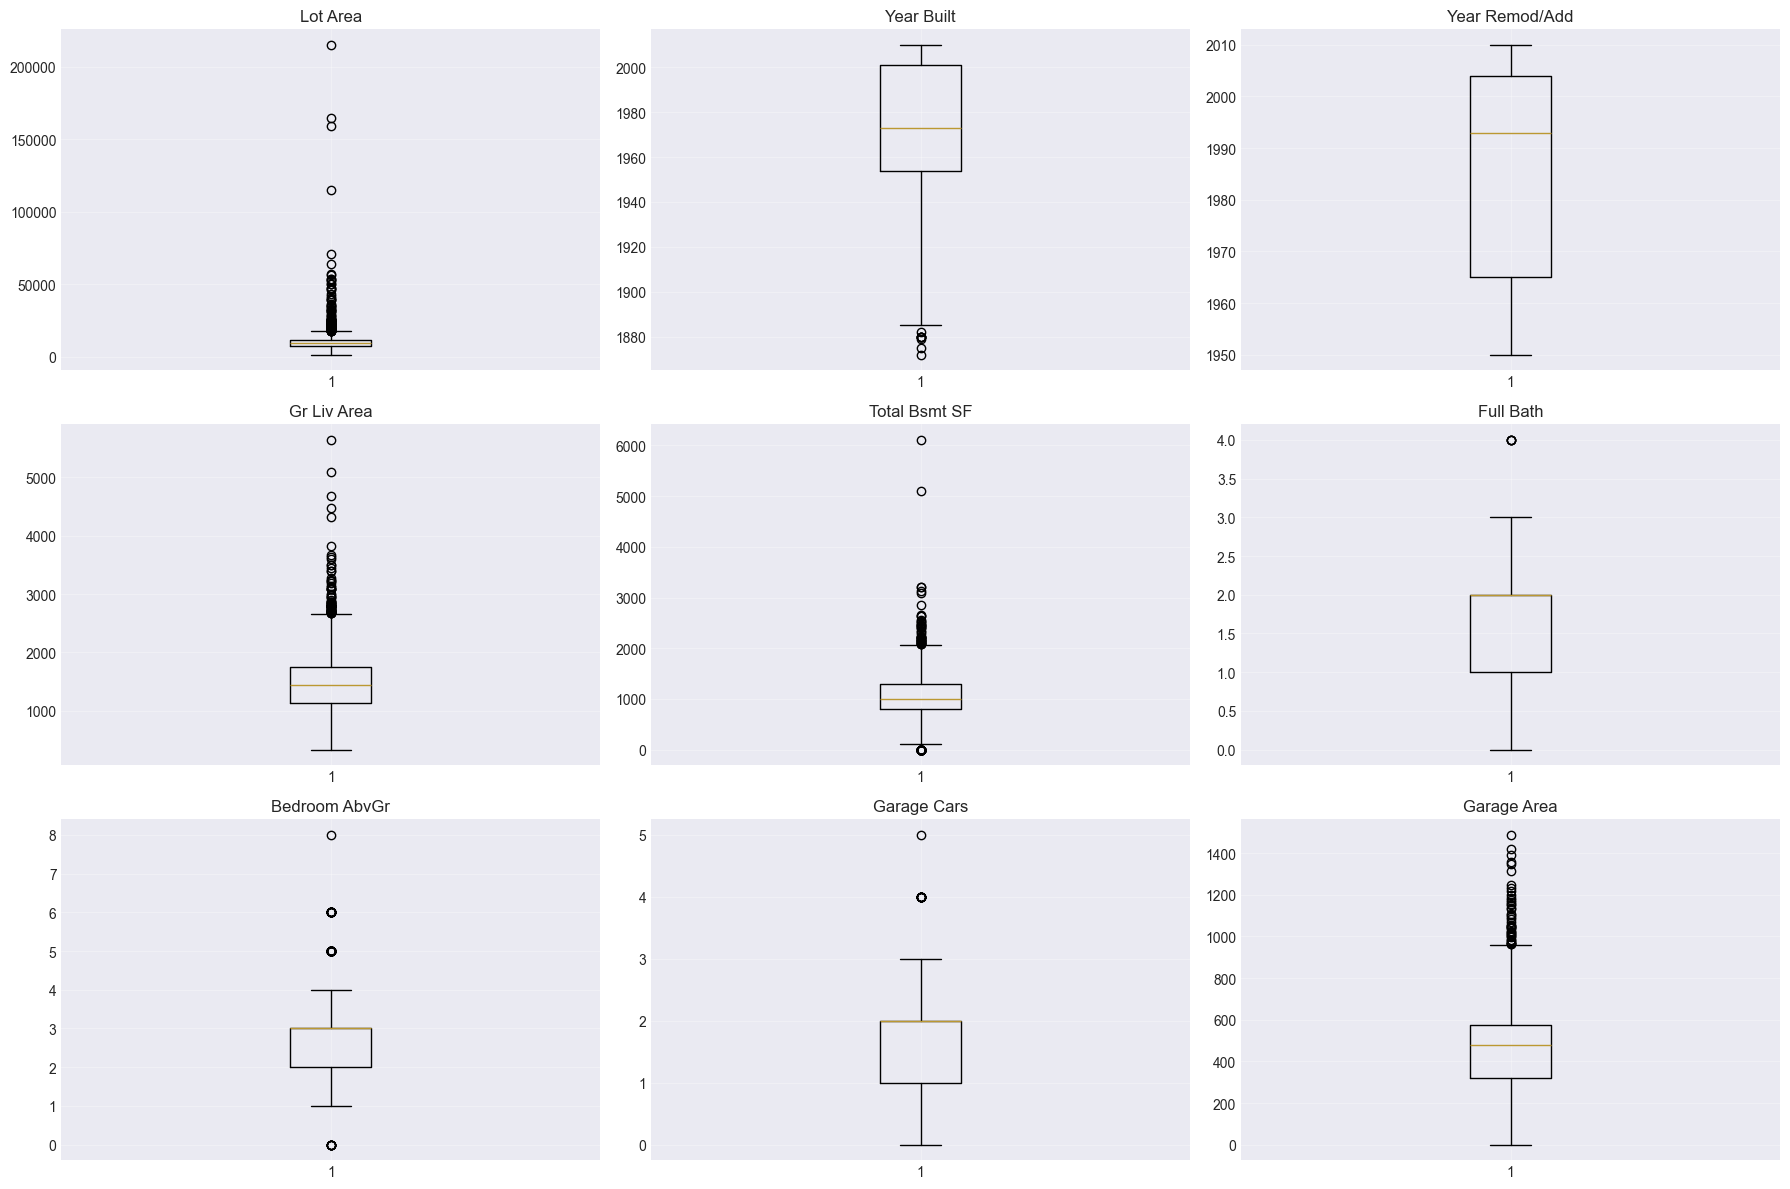

In [18]:
# Visualizar outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

features_to_plot = main_numerical + ['SalePrice']

for idx, col in enumerate(features_to_plot):
    if idx < len(axes) and col in df.columns:
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'{col}')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Análise Temporal

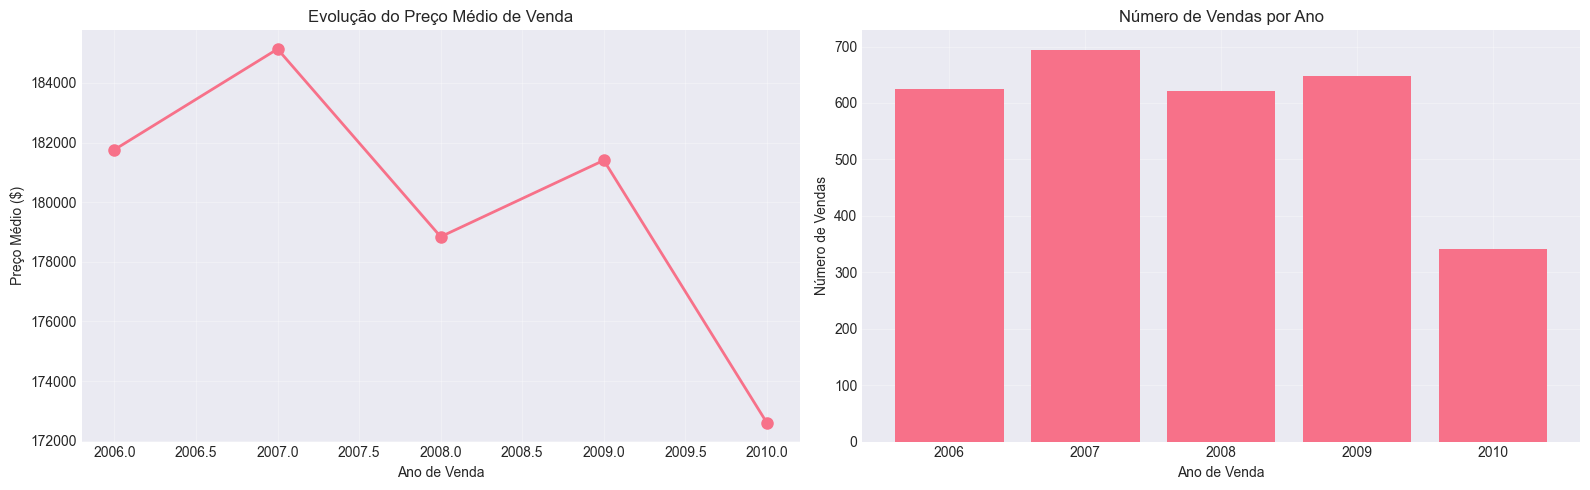

In [19]:
# Análise por ano de venda
if 'Yr Sold' in df.columns:
    yearly_sales = df.groupby('Yr Sold').agg({
        'SalePrice': ['mean', 'median', 'count']
    }).reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Preço médio por ano
    axes[0].plot(yearly_sales['Yr Sold'], yearly_sales['SalePrice']['mean'], 
                 marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Ano de Venda')
    axes[0].set_ylabel('Preço Médio ($)')
    axes[0].set_title('Evolução do Preço Médio de Venda')
    axes[0].grid(True, alpha=0.3)
    
    # Número de vendas por ano
    axes[1].bar(yearly_sales['Yr Sold'], yearly_sales['SalePrice']['count'])
    axes[1].set_xlabel('Ano de Venda')
    axes[1].set_ylabel('Número de Vendas')
    axes[1].set_title('Número de Vendas por Ano')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

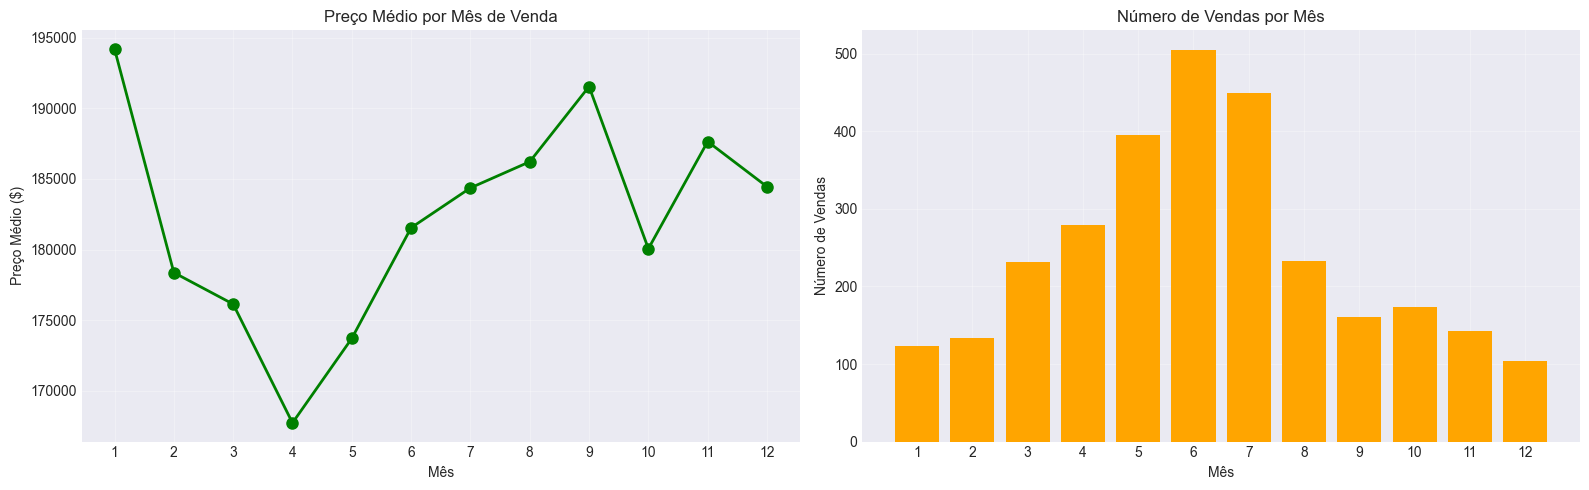

In [21]:
# Análise por mês de venda
if 'Mo Sold' in df.columns:
    monthly_sales = df.groupby('Mo Sold').agg({
        'SalePrice': ['mean', 'count']
    }).reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Preço médio por mês
    axes[0].plot(monthly_sales['Mo Sold'], monthly_sales['SalePrice']['mean'], 
                 marker='o', linewidth=2, markersize=8, color='green')
    axes[0].set_xlabel('Mês')
    axes[0].set_ylabel('Preço Médio ($)')
    axes[0].set_title('Preço Médio por Mês de Venda')
    axes[0].set_xticks(range(1, 13))
    axes[0].grid(True, alpha=0.3)
    
    # Número de vendas por mês
    axes[1].bar(monthly_sales['Mo Sold'], monthly_sales['SalePrice']['count'], color='orange')
    axes[1].set_xlabel('Mês')
    axes[1].set_ylabel('Número de Vendas')
    axes[1].set_title('Número de Vendas por Mês')
    axes[1].set_xticks(range(1, 13))
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Conclusões

### Principais Descobertas:

1. **Distribuição do Target**:
   - O preço de venda apresenta distribuição assimétrica positiva
   - Presença de outliers em valores altos
   - Possível necessidade de transformação logarítmica

2. **Features Mais Importantes**:
   - Overall Qual (Qualidade geral)
   - Gr Liv Area (Área de estar)
   - Garage Cars/Area (Garagem)
   - Year Built (Ano de construção)
   - Total Bsmt SF (Área do porão)

3. **Valores Ausentes**:
   - Algumas features apresentam muitos valores ausentes
   - Necessário tratamento adequado (imputação ou remoção)

4. **Outliers**:
   - Presença significativa de outliers em várias features
   - Importante avaliar se devem ser removidos ou tratados

5. **Padrões Temporais**:
   - Variação sazonal nos preços
   - Tendências anuais identificadas